<a href="https://colab.research.google.com/github/ArcticFoox/optimization/blob/main/LecNADL_T08_NN_LM_tf_0615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Lecture-NADL] 딥러닝의 이해(1)**: 인공 신경망 기반 학습모델(1)

# **I. 대표적 문제: 다중 분류**
- MNIST: 손글씨 숫자 (0~9)

- NN 구조
 - 입력층: 28x28
 - 은닉층: 1개, 완전연결망, #(뉴런)=128, 활성화함수(ReLU)
 - 출력층: #(뉴런)=10, 활성화함수(softmax)
 - 선택: dropout(p=0.2, 0.5, 0.8)

- 수치 최적화 Algo.
 - 선택: SGD, RMSPrpo, Adam 알고리즘
 - 선책: #(epoch) = 5

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# 검증 데이터 생성
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

## optimizer: sgd, rmsprop, adam
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, \
                    y_train, \
                    epochs=5,\
                    validation_data=(x_valid,y_valid))
#history = model.fit(x_train, y_train, epochs=5)
#model.fit(x_train, y_train, epochs=5)

print()
print('---------------------------------------')
print('Evaluation Result')
model.evaluate(x_test,  y_test, verbose=1)

Epoch 1/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8627 - accuracy: 0.7455 - val_loss: 0.3995 - val_accuracy: 0.8974
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.8598 - val_loss: 0.3134 - val_accuracy: 0.9164
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4067 - accuracy: 0.8832 - val_loss: 0.2732 - val_accuracy: 0.9264
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3617 - accuracy: 0.8972 - val_loss: 0.2461 - val_accuracy: 0.9346
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3297 - accuracy: 0.9058 - val_loss: 0.2242 - val_accuracy: 0.9390

---------------------------------------
Evaluation Result
313/313 [==============================] - 1s 2ms/step - loss: 0.2256 - accuracy: 0.9357


[0.22556987404823303, 0.935699999332428]

In [ ]:
x_new = x_test[:3]
y_prob = model.predict(x_new)


print('예측된 확률: ', y_prob)
print('예측된 확률(반올림): ', y_prob.round(2))
print('실제 값: ', y_test[:3])

예측된 확률:  [[7.1419447e-05 1.8585612e-06 2.9399688e-04 1.2563219e-03 5.8478799e-06
  5.4127675e-05 2.5110111e-07 9.9727565e-01 5.6165110e-05 9.8428596e-04]
 [3.2481621e-03 4.2572719e-05 9.7310817e-01 4.8039095e-03 3.8181338e-07
  4.4535040e-03 1.2558199e-02 5.6989131e-07 1.7836462e-03 7.9701903e-07]
 [1.8177698e-04 9.7363007e-01 6.7949849e-03 3.0326156e-03 1.1237845e-03
  2.3230072e-03 1.0476756e-03 6.1548660e-03 4.6378751e-03 1.0732654e-03]]
예측된 확률(반올림):  [[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.97 0.01 0.   0.   0.   0.   0.01 0.   0.  ]]
실제 값:  [7 2 1]


# **II. 추가 내용: 계산실험 참고용**

In [ ]:
history.history

{'accuracy': [0.7316727042198181,
  0.8585090637207031,
  0.8812363743782043,
  0.8950909376144409,
  0.9033636450767517],
 'loss': [0.8921475410461426,
  0.48946624994277954,
  0.4119240343570709,
  0.36472761631011963,
  0.33899572491645813],
 'val_accuracy': [0.9002000093460083,
  0.9187999963760376,
  0.9276000261306763,
  0.9341999888420105,
  0.9391999840736389],
 'val_loss': [0.4074825942516327,
  0.31569308042526245,
  0.2759992778301239,
  0.2475006878376007,
  0.22612278163433075]}

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               100480    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


x_train shape: (55000, 28, 28)
y_train shape: (55000,)
x_valid shape: (5000, 28, 28)
y_valid shape: (5000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


label:  7


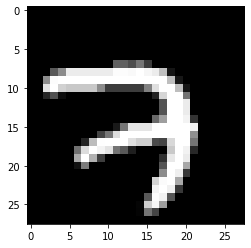

In [ ]:
import matplotlib.pyplot as plt

sample_img = x_train[0]
print('label: ', y_train[0])

plt.figure()
plt.imshow(sample_img, cmap='gray')
#plt.imshow(sample_img)
plt.show()



In [ ]:
model.layers

In [ ]:
hiddenL1 = model.layers[1]
weights, biases = hiddenL1.get_weights()
print('weights shape: ', weights.shape)
print('biases shape: ', biases.shape)
print(weights)
print(biases)

weights shape:  (784, 128)
biases shape:  (128,)
[[-0.02019886  0.03684014 -0.0460911  ... -0.04577888 -0.00854809
  -0.06063263]
 [ 0.02065828  0.01970186 -0.0490008  ...  0.00319619  0.02620475
   0.02240365]
 [ 0.07367059  0.07660537  0.04007366 ...  0.026222   -0.07201074
   0.03084967]
 ...
 [-0.02315705  0.03930235  0.00045739 ...  0.00888176  0.05262468
   0.00571168]
 [-0.05549307 -0.00032396 -0.06585637 ... -0.04145681  0.01965386
  -0.0754986 ]
 [-0.06796335 -0.01184832  0.02653658 ...  0.0386462   0.07018428
   0.0758158 ]]
[ 0.06187159 -0.06703889 -0.10190473  0.00703868  0.09687813  0.01920653
 -0.00451483 -0.07254665  0.02794105 -0.16798054  0.00754614 -0.06379969
 -0.03625372  0.02881036 -0.01987878  0.07269057 -0.09073702  0.00279266
 -0.0156065   0.07390889  0.05983572  0.06553832 -0.02781999  0.03674275
  0.06861639 -0.05158756  0.07215084  0.06392117  0.01749094 -0.0896721
 -0.00096267  0.02647377  0.13189104  0.04010459 -0.02503007  0.03068636
 -0.07010858 -0.036171

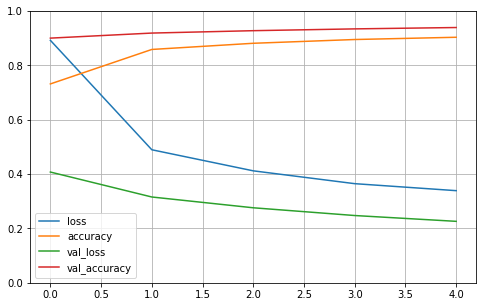

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()